<a href="https://colab.research.google.com/github/Calm-leon/proyecto-an-lisis-de-datos/blob/main/Puchamon_final_PTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## P 1: Importación de bibliotecas a usar.

In [ ]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
from matplotlib.ticker import PercentFormatter # Da formato de porcentajes a los graficos.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

## Respuesta 1:

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.

- **Scipy.stats**

In [ ]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

## P2: ¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

## Respuesta 2:

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [ ]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Limpieza del Conjunto de Datos.
-----------------


In [ ]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


In [ ]:
# Información del la base de datos Puchamon
Puchamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  802 non-null    int64  
 1   name            802 non-null    object 
 2   hp              802 non-null    int64  
 3   attack          802 non-null    int64  
 4   defense         802 non-null    int64  
 5   height_m        802 non-null    float64
 6   weight_kg       802 non-null    float64
 7   speed           802 non-null    int64  
 8   sp_attack       802 non-null    int64  
 9   sp_defense      802 non-null    int64  
 10  is_legendary    802 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 69.0+ KB


In [ ]:
# Base final a tranajar
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


----------------------
# Análisis Descriptivo de Pokemones Legendarios
----------------------

In [ ]:
# Base de datos 
Filtronormales =  Puchamon['is_legendary'] == 1
Legendarios= Puchamon[Filtronormales]
Legendarios

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
143,144,Articuno,90,85,100,1.7,55.4,85,95,125,1
144,145,Zapdos,90,90,85,1.6,52.6,100,125,90,1
145,146,Moltres,90,100,90,2.0,60.0,90,125,85,1
149,150,Mewtwo,106,150,70,2.0,122.0,140,194,120,1
150,151,Mew,100,100,100,0.4,4.0,100,100,100,1
242,243,Raikou,90,85,75,1.9,178.0,115,115,100,1
243,244,Entei,115,115,85,2.1,198.0,100,90,75,1
244,245,Suicune,100,75,115,2.0,187.0,85,90,115,1
248,249,Lugia,106,90,130,5.2,216.0,110,90,154,1
249,250,Ho-Oh,106,130,90,3.8,199.0,90,110,154,1


En primer lugar, analizaremos las variables con el método `.describe` que nos arroja un objeto tipo dataframe donde las columnas son las variables del dataframe inicial y las filas corresponden al número total de los datos; la media; la desviación estándar; el mínimo dato; el primer, segundo y tercer cuartil y por último el máximo dato.

In [ ]:
T =Legendarios.iloc[:,1:10].describe()

ModaLegendarios=Legendarios.mode(axis=0,numeric_only= True)
MdLegendarios=ModaLegendarios.head(1)
MdLegendarios = MdLegendarios.drop(['pokedex_number','is_legendary'],axis=1)
MdLegendarios
T= T.append(MdLegendarios,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)
T

var=Legendarios.var()              #varianza
var=pd.DataFrame(var, columns = ['nombre'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var

<ipython-input-8-2239b839897a>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Legendarios.var()              #varianza


,nombre
hp,1015.709273
attack,1062.533835
defense,815.669799
height_m,2.516021
weight_kg,55654.073878
speed,525.838972
sp_attack,1217.427318
sp_defense,854.320175


Adicionalemente, se evidencia las estadísticas de resumen para todas las variables excepto 'is_legendary' en los datos de *Legendarios* como se había mencionado anteriormente

In [ ]:
Legendarios.iloc[:,0:10].describe()

,pokedex_number,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,544.684211,97.403509,109.421053,99.719298,2.359649,211.807018,92.649123,115.701754,106.298246
std,216.108534,31.870194,32.596531,28.559933,1.586197,235.911157,22.931179,34.891651,29.228756
min,144.000000,43.000000,29.000000,31.000000,0.100000,0.100000,37.000000,29.000000,31.000000
25%,381.000000,80.000000,90.000000,85.000000,1.500000,52.600000,85.000000,91.000000,90.000000
50%,638.000000,91.000000,107.000000,100.000000,1.900000,187.000000,95.000000,120.000000,100.000000
75%,721.000000,106.000000,130.000000,115.000000,3.200000,260.000000,108.000000,137.000000,120.000000
max,802.000000,223.000000,180.000000,200.000000,7.000000,999.900000,151.000000,194.000000,200.000000


## Diagramas de caja y densidad para cada una de las variables de la base Legendarios

### Variable `hp`

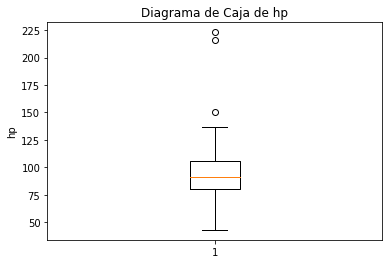

In [ ]:
# Diagrama de caja
plt.boxplot(Legendarios['hp'])

plt.title('Diagrama de Caja de hp')
plt.ylabel('hp')
plt.show()

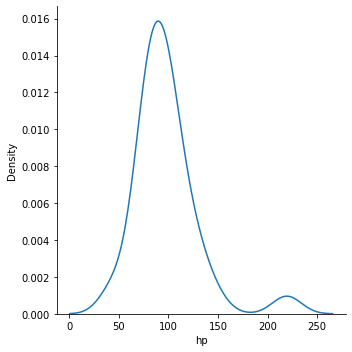

In [ ]:
# Diagrama de densidad
sns.displot(Legendarios['hp'], kind='kde')
plt.show()

#### Distribución de Frecuencias

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Legendarios['hp'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Legendarios)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
80,9,15.789474,15.789474
100,8,14.035088,29.824561
90,5,8.771930,38.596491
91,4,7.017544,45.614035
70,4,7.017544,52.631579
106,3,5.263158,57.894737
75,2,3.508772,61.403509
137,2,3.508772,64.912281
120,2,3.508772,68.421053
79,2,3.508772,71.929825


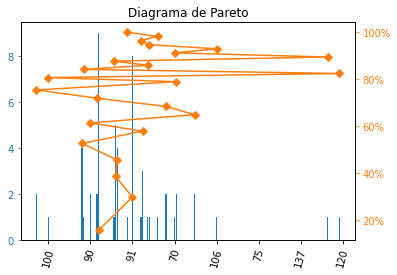

In [ ]:
# Indicamos que solo utilizaremos un gráfico
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# Le asignamos un título al gráfico
ax.set_title('Diagrama de Pareto')

# Creamos una gráfica de barras con las frecuencias absolutas
ax.bar(frec_df.index, frec_df['Frec_abs'], color = 'C0')

# Graficamos los valores de la frecuencia relativa acumulada
ax2 = ax.twinx() # Le indicamos que este será nuestro eje a graficar
ax2.plot(frec_df.index, frec_df['Frec_rel_%_acum'], color='C1', marker='D', ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Asignamos un color para las etiquetas de los ejes "y"
ax.tick_params(axis = 'y', colors = 'C0')
ax2.tick_params(axis = 'y', colors = 'C1')

#Rotamos las etiquetas del eje de las x's
ax.set_xticklabels(frec_df.index, rotation = 75)

plt.show()

##Medidas de tendencia central.
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `attack`

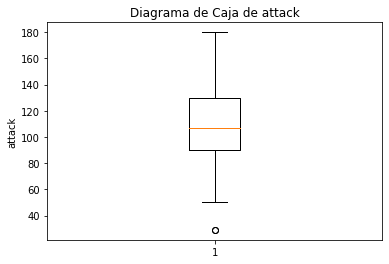

In [ ]:
plt.boxplot(Legendarios['attack'])

plt.title('Diagrama de Caja de attack')
plt.ylabel('attack')
plt.show()

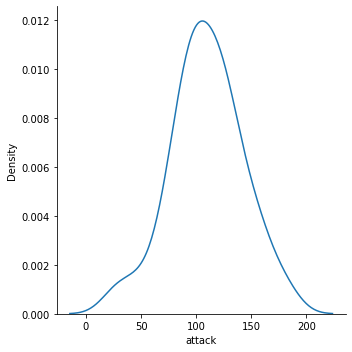

In [ ]:
sns.displot(Legendarios['attack'], kind='kde')
plt.show()

###Distribución de Frecuencias.

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Legendarios['attack'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Legendarios)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
100,7,12.280702,12.280702
120,6,10.526316,22.807018
90,5,8.771930,31.578947
75,4,7.017544,38.596491
85,3,5.263158,43.859649
130,3,5.263158,49.122807
160,3,5.263158,54.385965
150,3,5.263158,59.649123
131,2,3.508772,63.157895
29,2,3.508772,66.666667


##Medidas de tendencia central.
A continuación se presentará los valores para la variable `attack` de las medidas de tendencia central más utilizadas.

- La **media** de attack es $\bar{x}=$109,42. En otras palabras, en promedio cada Pokémon puede quitar 109,42 puntos de vida al propiciar un ataque en combate.
- La mitad de los Pokemones quita puntos de vida al propiciar un ataque menor a $Q_2=$107 (**mediana**), de la misma manera, la otra mitad puede quitar $Q_2=$107 puntos de vida al propiciar un ataque.

### Variable `defense`

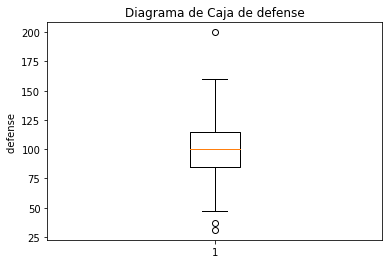

In [ ]:
plt.boxplot(Legendarios['defense'])

plt.title('Diagrama de Caja de defense')
plt.ylabel('defense ')
plt.show()

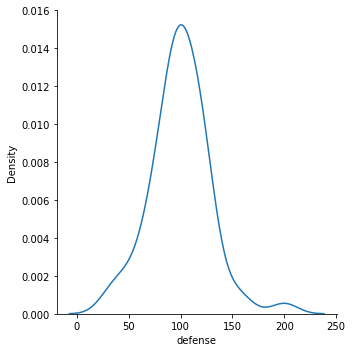

In [ ]:
sns.displot(Legendarios['defense'], kind='kde')
plt.show()

###Distribución de Frecuencias.

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Legendarios['defense'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Legendarios)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
100,9,15.789474,15.789474
90,6,10.526316,26.315789
120,6,10.526316,36.842105
115,4,7.017544,43.859649
70,3,5.263158,49.122807
85,3,5.263158,54.385965
75,2,3.508772,57.894737
130,2,3.508772,61.403509
110,2,3.508772,64.912281
95,2,3.508772,68.421053


##Medidas de tendencia central.
A continuación se presentará los valores para la variable `defense` de las medidas de tendencia central más utilizadas.

- La **media** de defense es $\bar{x}=$99,71. En otras palabras, en promedio cada Pokémon obtiene 99,71 puntos de vida que evita que le quiten al recibir un ataque en combate.
- La mitad de los Pokemones tiene menor a $Q_2=$100 (**mediana**) puntos de vida que evita que le quiten al recibir un ataque, de la misma manera, la otra mitad tiene mayor a $Q_2=$100 puntos de vida que evita que le quiten al recibir un ataque.

###Distribución de Frecuencias

##Medidas de tendencia central.
A continuación se presentará los valores para la variable `Friccion` de las medidas de tendencia central más utilizadas.

- La **media** de Friccion es $\bar{x}=$21,41. En otras palabras, en promedio cada Pokémon se ralentiza 21,41 debido a su altura y peso.
- La mitad de los Pokemones tiene una ralentización menor a $Q_2=$18.9(**mediana**) debido a su altura y peso, de la misma manera, la otra mitad tiene una ralentización mayor a $Q_2=$18.9 debido a su altura y peso.

### Variable `speed_D`

In [ ]:
plt.boxplot(Legendarios['speed_D'])

plt.title('Diagrama de Caja de speed_D')
plt.ylabel('speed_D')
plt.show()

In [ ]:
sns.displot(Legendarios['speed_D'], kind='kde')
plt.show()

###Distribución de Frecuencias.

##Medidas de tendencia central.
A continuación se presentará los valores para la variable `speed_D` de las medidas de tendencia central más utilizadas.

- La **media** de speed_D es $\bar{x}=$114,06. En otras palabras, en promedio cada Pokémon tiene una velocidad de 114,06 para moverse en combate sin importar su tamaño ni peso.
- La mitad de los Pokemones tiene una velocidad menor a $Q_2=$115.06(**mediana**) para moverse en combate sin importar su tamaño ni peso, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$115.06 para moverse en combate sin importar su tamaño ni peso.

### Variable `sp_attack_D`

In [ ]:
plt.boxplot(Legendarios['sp_attack_D'])

plt.title('Diagrama de Caja de sp_attack_D')
plt.ylabel('sp_attack_D')
plt.show()

In [ ]:
sns.displot(Legendarios['sp_attack_D'], kind='kde')
plt.show()

###Distribución de Frecuencias. 

##Medidas de tendencia central.
A continuación se presentará los valores para la variable `sp_attack_D` de las medidas de tendencia central más utilizadas.

- La **media** de sp_attack_D es $\bar{x}=$137,11. En otras palabras, en promedio cada Pokémon tiene una velocidad de 137,11 para propiciar un ataque en combate sin importar su tamaño ni peso.
- La mitad de los Pokemones tiene una velocidad menor a $Q_2=$131.98(**mediana**) para propiciar un ataque en combate sin importar su tamaño ni peso, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$131.98 para propiciar un ataque en combate sin importar su tamaño ni peso.

### Variable `sp_defense_D`

In [ ]:
plt.boxplot(Legendarios['sp_defense_D'])

plt.title('Diagrama de Caja de sp_defense_D')
plt.ylabel('sp_defense_D')
plt.show()

In [ ]:
sns.displot(Legendarios['sp_defense_D'], kind='kde')
plt.show()

###Diagrama de Frecuencias

##Medidas de tendencia central.
A continuación se presentará los valores para la variable `sp_defense_D` de las medidas de tendencia central más utilizadas.

- La **media** de sp_defense_D es $\bar{x}=$127,71. En otras palabras, en promedio cada Pokémon tiene una velocidad de 127,71 para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso.
- La mitad de los Pokemones tiene una velocidad menor a $Q_2=$123.96(**mediana**) para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso, de la misma manera, la otra mitad tiene una velocidad mayor a $Q_2=$123.96 para anular los puntos de vida del ataque enemigo sin importar su tamaño ni peso.

###Diagrama de Frecuencias

## Matriz de correlación de la base Legendarios

----------------------
# Análisis Pokemones No Legendarios
----------------------

In [ ]:
# Base de datos
FiltroLegendario =  Puchamon['is_legendary'] == 0
Pokemones= Puchamon[FiltroLegendario]
Pokemones

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Kommo-o,75,110,125,1.6,78.2,85,100,105,0
793,794,Buzzwole,107,139,139,2.4,333.6,79,53,53,0
795,796,Xurkitree,83,89,71,3.8,100.0,83,173,71,0
796,797,Celesteela,97,101,103,9.2,999.9,61,107,101,0


Continuemos nuestro análisis de las variables de la base de datos `Pokemones` con el método `.describe` que nos arroja un objeto tipo dataframe.

In [ ]:
Pokemones.iloc[:,1:10].describe()

,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,66.824161,75.472483,71.001342,1.061745,48.881879,64.366443,67.947651,68.242953
std,24.854360,30.833312,29.981513,0.961308,80.752140,28.347236,29.542091,25.948383
min,1.000000,5.000000,5.000000,0.100000,0.100000,5.000000,10.000000,20.000000
25%,50.000000,53.000000,50.000000,0.500000,8.500000,43.000000,45.000000,50.000000
50%,65.000000,71.000000,65.000000,0.900000,24.500000,60.000000,63.000000,65.000000
75%,79.000000,95.000000,86.000000,1.400000,55.800000,84.000000,85.000000,85.000000
max,255.000000,185.000000,230.000000,14.500000,999.900000,180.000000,175.000000,230.000000


## Diagramas de caja y dencidad para cada una de las variables de la base Pokemones

### Variable `hp`

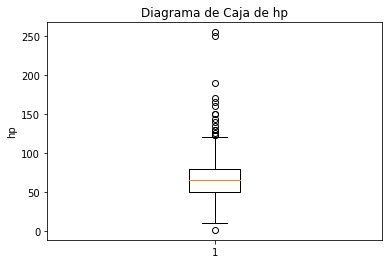

In [ ]:
plt.boxplot(Pokemones['hp'])

plt.title('Diagrama de Caja de hp')
plt.ylabel('hp')
plt.show()

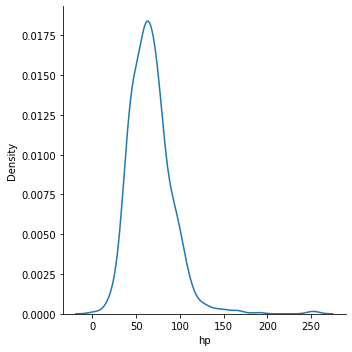

In [ ]:
sns.displot(Pokemones['hp'], kind='kde')
plt.show()

###Distribución de Frecuencias

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Pokemones['hp'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Pokemones)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
60,68,9.127517,9.127517
50,53,7.114094,16.241611
70,51,6.845638,23.087248
65,44,5.906040,28.993289
75,42,5.637584,34.630872
...,...,...,...
144,1,0.134228,99.463087
170,1,0.134228,99.597315
99,1,0.134228,99.731544
37,1,0.134228,99.865772


### Variable `attack`

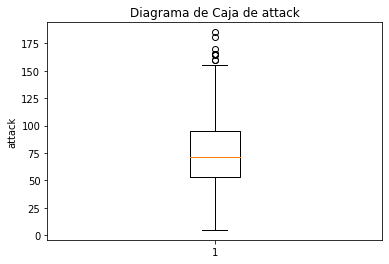

In [ ]:
plt.boxplot(Pokemones['attack'])

plt.title('Diagrama de Caja de attack')
plt.ylabel('attack')
plt.show()

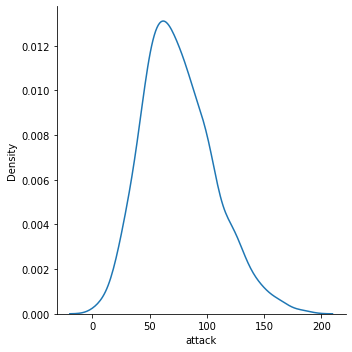

In [ ]:
sns.displot(Pokemones['attack'], kind='kde')
plt.show()

###Distribución de Frecuencias

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Pokemones['attack'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Pokemones)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
60,35,4.697987,4.697987
65,35,4.697987,9.395973
55,35,4.697987,14.093960
50,33,4.429530,18.523490
80,33,4.429530,22.953020
...,...,...,...
136,1,0.134228,99.463087
24,1,0.134228,99.597315
170,1,0.134228,99.731544
106,1,0.134228,99.865772


### Variable `defense`

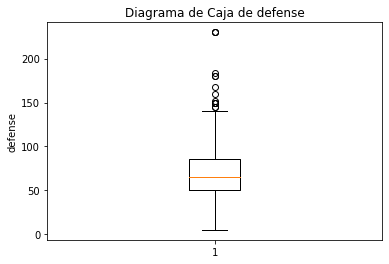

In [ ]:
plt.boxplot(Pokemones['defense'])

plt.title('Diagrama de Caja de defense')
plt.ylabel('defense')
plt.show()

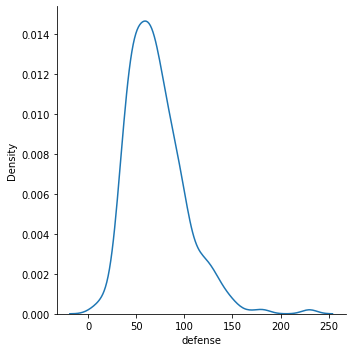

In [ ]:
sns.displot(Pokemones['defense'], kind='kde')
plt.show()

###Distribución de Frecuencias

In [ ]:
# Calculamos frecuencia absoluta
frec = pd.value_counts(Pokemones['defense'])

# Guardamos la información en un dataframe
frec_df = pd.DataFrame(frec)

# Asignamos el nombre Frec_abs a la columna
frec_df.columns = ['Frec_abs']

# Calculamos frecuencia relativa en porcentaje
frec_df['Frec_rel_%']=100*frec_df['Frec_abs']/len(Pokemones)

# Calculamos la frecuencia relativa en porcentaje acumulada
# Obtenemos los valores de las Frecuencias Absolutas
Frec_rel_val = frec_df['Frec_rel_%'].values

# Creamos una lista vacia en donde registraremos las frecuecnias absolutas acumuladas
acum = []

# Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

# Recorremos la lista de las frecuencias absolutas para irlas sumando
for i in Frec_rel_val:
  valor_acum = valor_acum + i
  acum.append(valor_acum)

frec_df['Frec_rel_%_acum'] = acum
frec_df

,Frec_abs,Frec_rel_%,Frec_rel_%_acum
50,51,6.845638,6.845638
70,46,6.174497,13.020134
60,45,6.040268,19.060403
80,40,5.369128,24.429530
40,39,5.234899,29.664430
...,...,...,...
56,1,0.134228,99.463087
28,1,0.134228,99.597315
109,1,0.134228,99.731544
107,1,0.134228,99.865772


## Matriz de correlación de la base Pokemones

In [ ]:
# Creación de la Matiz
corr_matrix = Pokemones.iloc[:,1:10].corr()
corr_matrix

,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
hp,1.000000,0.378852,0.206935,0.378816,0.369068,0.103885,0.309342,0.338977
attack,0.378852,1.000000,0.463529,0.352400,0.383247,0.296313,0.267268,0.221724
defense,0.206935,0.463529,1.000000,0.329948,0.421566,-0.041043,0.203459,0.500030
height_m,0.378816,0.352400,0.329948,1.000000,0.639328,0.129215,0.249715,0.266864
weight_kg,0.369068,0.383247,0.421566,0.639328,1.000000,-0.017944,0.159397,0.260025
speed,0.103885,0.296313,-0.041043,0.129215,-0.017944,1.000000,0.379605,0.173842
sp_attack,0.309342,0.267268,0.203459,0.249715,0.159397,0.379605,1.000000,0.471553
sp_defense,0.338977,0.221724,0.500030,0.266864,0.260025,0.173842,0.471553,1.000000


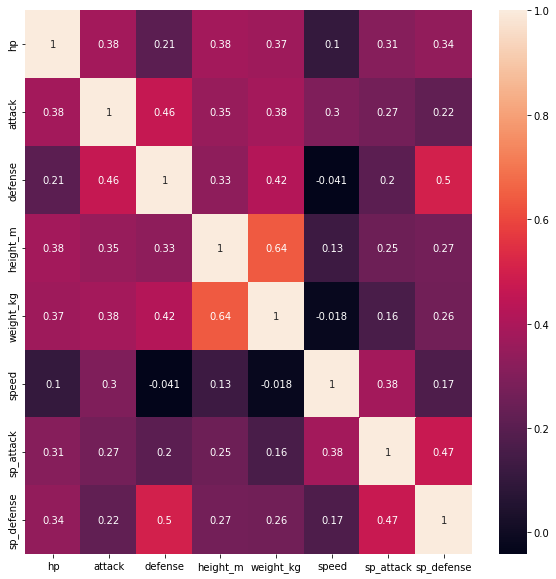

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
# Visualización de la matriz
plt.show()